# Gaussian_Naive_Bayes

Importing Library as follows

In [1]:
import pandas as pd

Importing dataset form local host and get dummy variables

In [2]:
Default = pd.read_csv("D:/Statistics (Python)/Datasets/Default.csv")
dum_Default = pd.get_dummies(Default, drop_first=True)

Importing sklearn library

In [3]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

In [4]:
X = dum_Default.iloc[:,[0,1,3]]
y = dum_Default.iloc[:,2]

 Create training and test sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state=42,
                                                    stratify=y)

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)

 Model Evaluation 

In [6]:
print(confusion_matrix(y_test, y_pred))

[[2883   17]
 [  72   28]]


In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2900
           1       0.62      0.28      0.39       100

    accuracy                           0.97      3000
   macro avg       0.80      0.64      0.69      3000
weighted avg       0.96      0.97      0.96      3000



In [13]:
print(accuracy_score(y_test, y_pred))

0.9703333333333334


 ROC

In [14]:
from sklearn.metrics import roc_curve, roc_auc_score

 Compute predicted probabilities: y_pred_prob

In [15]:
probs = gaussian.predict_proba(X_test)
y_pred_prob = probs[:,1]

 Generate ROC curve values: fpr, tpr, thresholds

In [16]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

 Plot ROC curve

In [17]:
import matplotlib.pyplot as plt

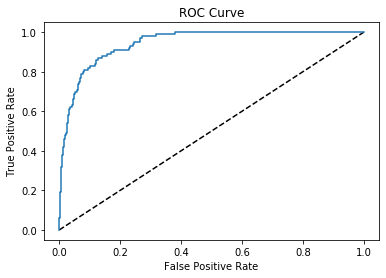

In [18]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [19]:
roc_auc_score(y_test, y_pred_prob) 

0.9440344827586207